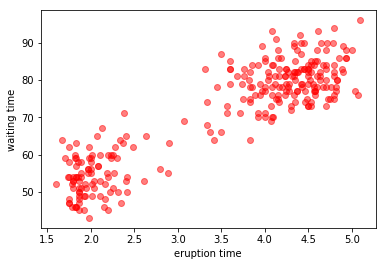

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import random

data=[]
f=open('faithful.dat')
for line in f:
    line=line.split()
    if not line or not line[0].isdigit(): continue
    data.append(line[1:])
data=np.array(data).astype(np.float)
plt.plot(data.T[0], data.T[1], 'ro', alpha=0.5)
plt.xlabel('eruption time')
plt.ylabel('waiting time')
plt.show()

In [190]:
def start_random_mu(data):    
    a,b=random.sample(range(len(data)),2)
    mu = np.array([data[a],data[b]])
#     sigma = [np.cov(data.T) for _ in range(2)]
    sigma=[0,0]
    for i in range(2):
        sigma[i] = np.zeros((2, 2))
        np.fill_diagonal(sigma[i], np.var(data.T[i]))
    pi=random.random()
    pi=np.array([pi,1-pi])
    return mu, sigma, pi

In [109]:
def gaussian(x, mu, sigma):
    dimension = len(x)
    cov_det = np.linalg.det(sigma)
    central_x = np.matrix(x - mu)
    cov_inverse = np.linalg.inv(sigma)
    left = 1 / np.sqrt(((2 * np.pi) ** dimension) * cov_det)
    right = -1 / 2 * central_x * cov_inverse * central_x.T
    ret = left * np.exp(right)
    return float(ret)

In [132]:
def e_step(data, mu, sigma, pi):
    gamma = np.zeros((len(data), 2))
    for i in range(len(data)):
        denominator = pi[0] * gaussian(data[i], mu[0], sigma[0]) + pi[1] * gaussian(data[i], mu[1], sigma[1])
        gamma[i][0] = pi[0] * gaussian(data[i], mu[0], sigma[0]) / denominator
        gamma[i][1] = pi[1] * gaussian(data[i], mu[1], sigma[1]) / denominator
    return gamma

In [133]:
def m_step(data, gamma):
    sample_size = len(data)    
    mu = np.zeros((2, 2))
    sigma = np.zeros((2, 2, 2))
    pi = np.zeros(2)
    gammaSum = np.zeros(2)
    
    for c in range(2):
        for i in range(sample_size):
            gammaSum[c]+=gamma[i][c]
            mu[c]+=(gamma[i][c])*data[i]
        mu[c]/=gammaSum[c]

        for i in range(sample_size):
            centered_x = np.zeros((1,2))+data[i]-mu[c]
            sigma[c] += gamma[i][c]*centered_x*centered_x.T/gammaSum[c]
        pi[c] = gammaSum[c]/sample_size
        
    return mu, sigma, pi

In [191]:
mu,sigma,pi=start_random_mu(data)
trajectories = [mu]
for i in range(50):
    gamma = e_step(data,mu,sigma,pi)
    mu,sigma,pi = m_step(data,gamma)
    trajectories.append(mu)

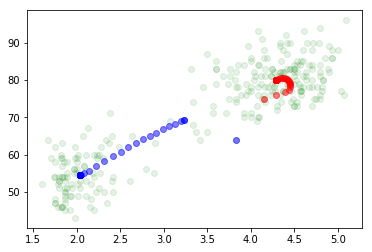

In [192]:
trajectories = np.array(trajectories)
plt.plot(data.T[0], data.T[1],'ro', alpha=0.1,color='green')
plt.plot(trajectories[:,0,0],trajectories[:,0,1],'ro', alpha=0.5, color='red')
plt.plot(trajectories[:,1,0],trajectories[:,1,1],'ro', alpha=0.5, color='blue')
plt.show()

In [193]:
iterationsToConverge = []
for k in range(50):
    mu,sigma,pi=start_random_mu(data)
    trajectories = [mu]
    for i in range(250):
        gamma = e_step(data,mu,sigma,pi)
        mu,sigma,pi = m_step(data,gamma)
        trajectories.append(mu)
        if np.linalg.norm(trajectories[-1]-trajectories[-2]) < 0.0001:
            iterationsToConverge.append(i)
            break
print(iterationsToConverge)

[23, 19, 19, 19, 16, 14, 17, 41, 32, 33, 19, 22, 18, 20, 20, 16, 17, 18, 31, 15, 13, 16, 14, 30, 26, 20, 22, 24, 14, 21, 32, 19, 22, 30, 14, 20, 20, 19, 19, 15, 14, 38, 22, 25, 20, 14, 16, 24, 21, 18]


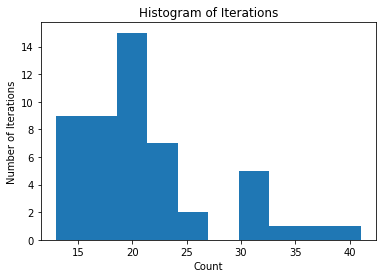

In [194]:
plt.hist(iterationsToConverge,bins=10)
plt.xlabel('Count')
plt.ylabel('Number of Iterations')
plt.title(r'Histogram of Iterations')
plt.show()

In [211]:
from sklearn.cluster import KMeans
def kmeansPrams(data):
    kmeans = KMeans(n_clusters=2).fit(data)
    cluster=[np.array([data[index] for index,l in enumerate(kmeans.labels_) if l == 0]), 
             np.array([data[index] for index,l in enumerate(kmeans.labels_) if l == 1])]
    mu=[np.mean(cluster[i], axis=0) for i in range(2)]
    sigma=[np.cov(cluster[i].T) for i in range(2)]
    return mu,sigma
kmeans_parameters(data)

([array([  4.29793023,  80.28488372]), array([  2.09433,  54.75   ])],
 [array([[  0.17865587,   0.76756385],
         [  0.76756385,  31.66690466]]), array([[  0.15583707,   0.99561869],
         [  0.99561869,  34.75505051]])],
 [0.5, 0.5])

In [214]:
mu,sigma,pi = *kmeansPrams(data),[0.5,0.5]
trajectories = [mu]
for i in range(50):
    gamma = e_step(data,mu,sigma,pi)
    mu,sigma,pi = m_step(data,gamma)
    trajectories.append(mu)

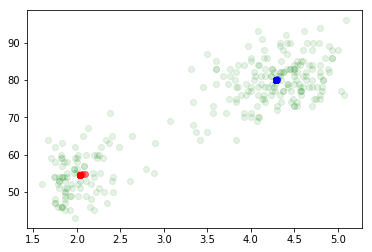

In [215]:
trajectories = np.array(trajectories)
plt.plot(data.T[0], data.T[1],'ro', alpha=0.1,color='green')
plt.plot(trajectories[:,0,0],trajectories[:,0,1],'ro', alpha=0.5, color='red')
plt.plot(trajectories[:,1,0],trajectories[:,1,1],'ro', alpha=0.5, color='blue')
plt.show()

In [217]:
iterationsToConverge = []
for k in range(50):
    mu,sigma,pi = *kmeansPrams(data),[0.5,0.5]
    trajectories = [mu]
    for i in range(250):
        gamma = e_step(data,mu,sigma,pi)
        mu,sigma,pi = m_step(data,gamma)
        trajectories.append(mu)
        if np.linalg.norm(trajectories[-1]-trajectories[-2]) < 0.0001:
            iterationsToConverge.append(i)
            break
print(iterationsToConverge)

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


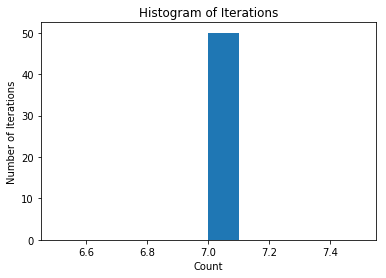

In [218]:
plt.hist(iterationsToConverge,bins=10)
plt.xlabel('Count')
plt.ylabel('Number of Iterations')
plt.title(r'Histogram of Iterations')
plt.show()